In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame

df = df.rename(columns={
    'chol': 'cholestrol',
    'cp': 'chest_pain',
    'fbs': 'BloodSugar',
    'restecg': 'resting_ecg',
    'exang': 'exercise_angina',
    'trestbps': 'resting_BP'
})

# Verify the column names
print(df.columns)


Index(['age', 'sex', 'chest_pain', 'resting_BP', 'cholestrol', 'BloodSugar',
       'resting_ecg', 'thalch', 'exercise_angina', 'oldpeak', 'slope', 'thal',
       'num'],
      dtype='object')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              908 non-null    int64  
 1   sex              908 non-null    object 
 2   chest_pain       908 non-null    object 
 3   resting_BP       908 non-null    int64  
 4   cholestrol       908 non-null    int64  
 5   BloodSugar       908 non-null    bool   
 6   resting_ecg      908 non-null    object 
 7   thalch           908 non-null    int64  
 8   exercise_angina  908 non-null    object 
 9   oldpeak          846 non-null    float64
 10  slope            908 non-null    object 
 11  thal             908 non-null    object 
 12  num              908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [34]:
df.describe()


,age,resting_BP,cholestrol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


#Missing Values

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


age                 0
sex                 0
chest_pain          0
resting_BP          0
cholestrol          0
BloodSugar          0
resting_ecg         0
thalch              0
exercise_angina     0
oldpeak            62
slope               0
thal                0
num                 0
dtype: int64


In [36]:
# Fill missing values in 'oldpeak' with the mean value
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())


#Visualisation

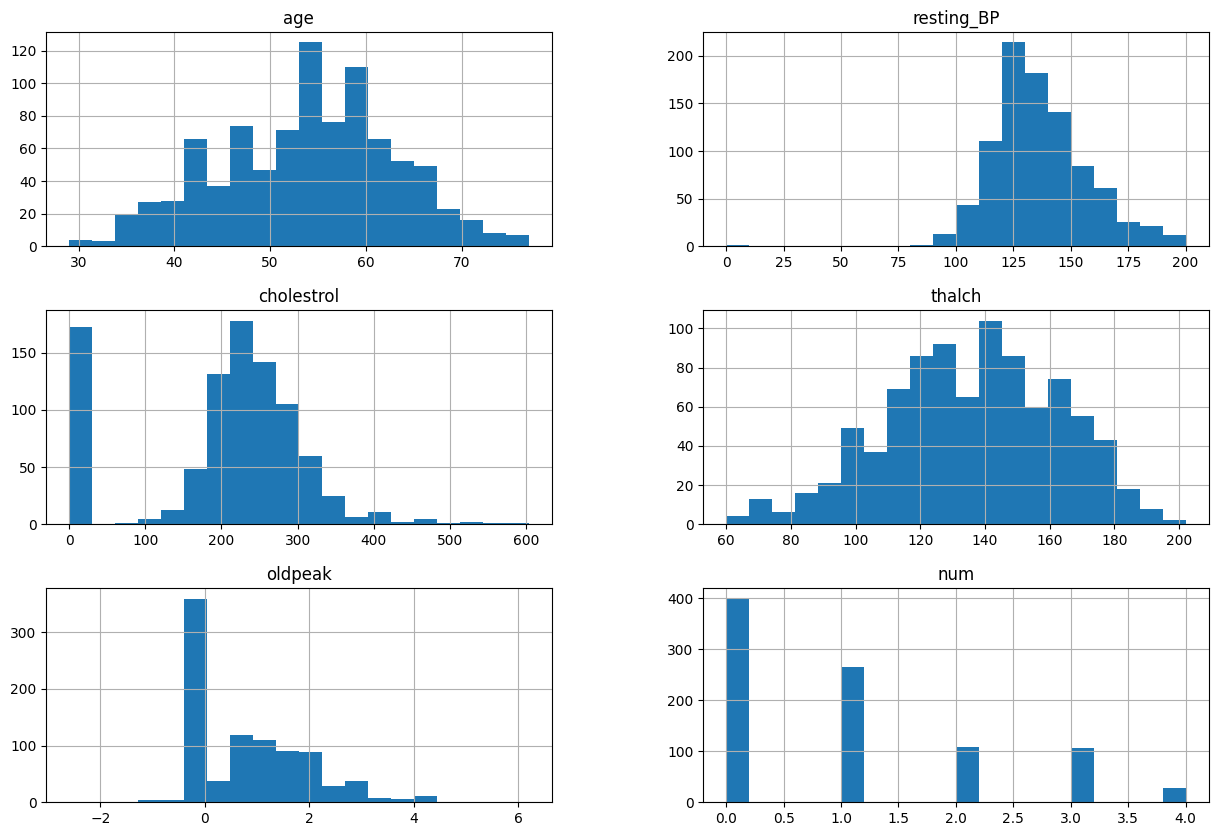

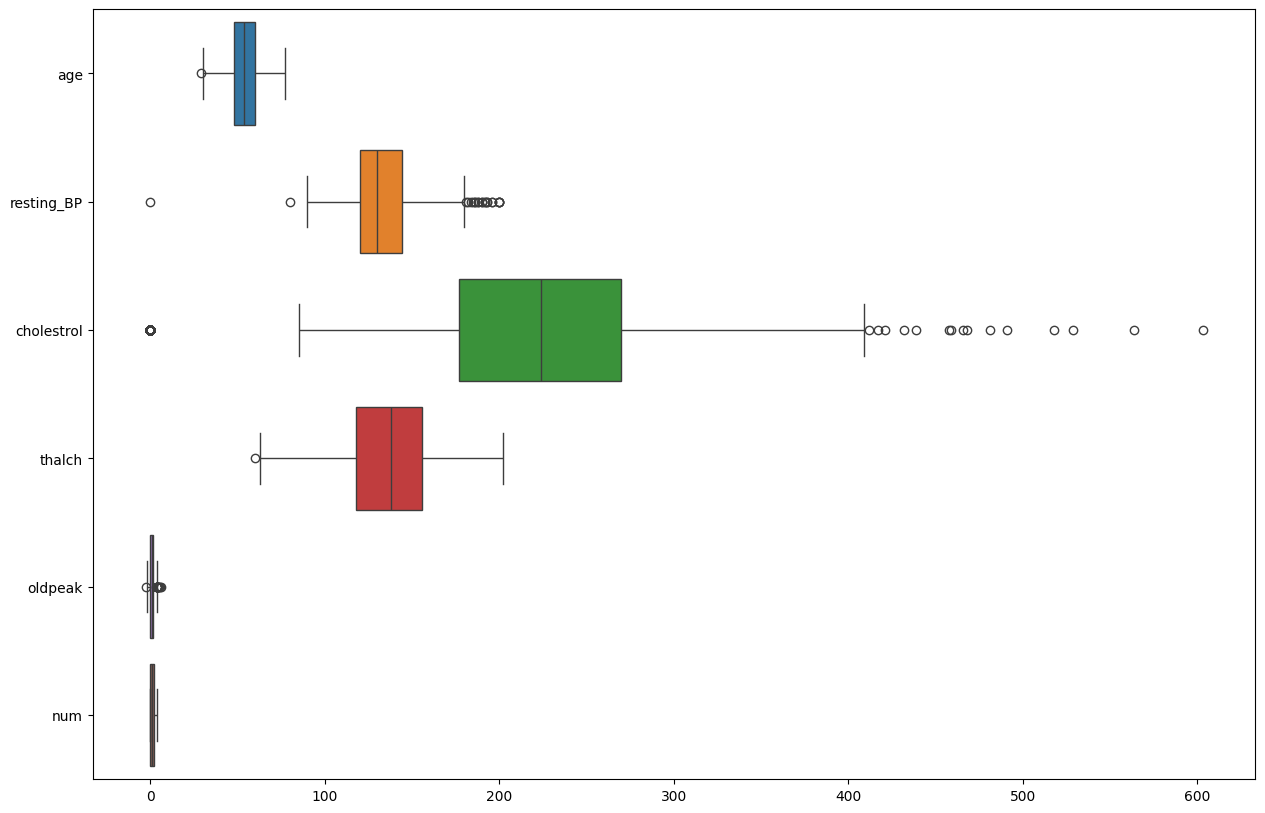

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=['number'])

# Histograms
numeric_features.hist(bins=20, figsize=(15, 10))
plt.show()

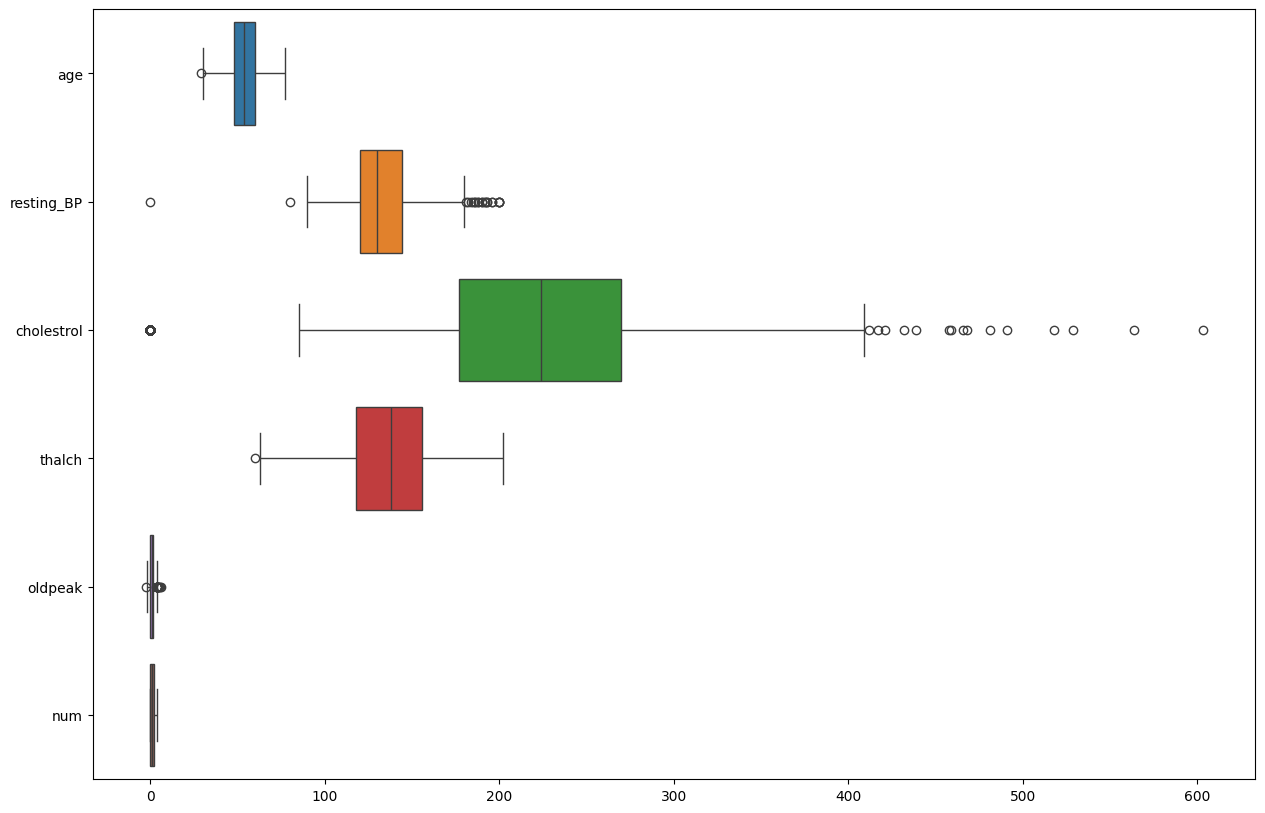

In [51]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_features, orient='h')
plt.show()

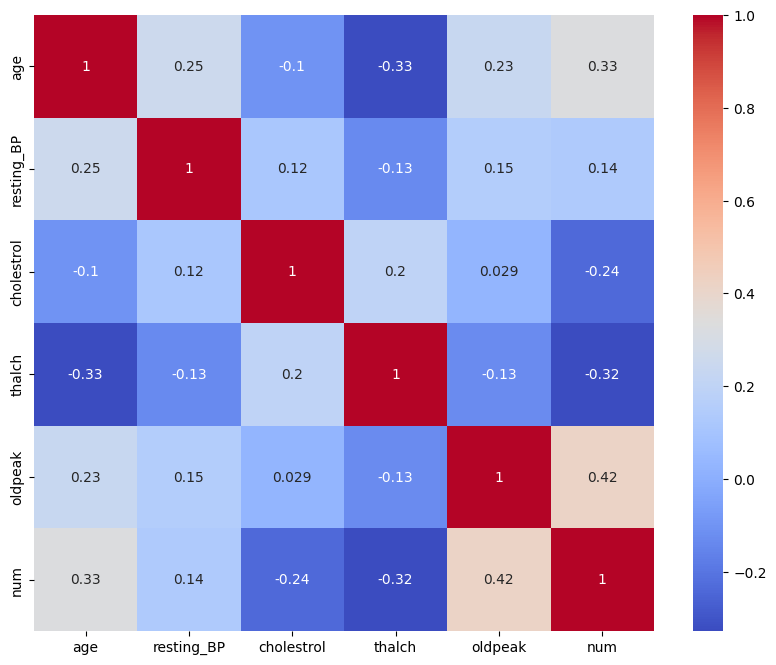

In [50]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = numeric_features.corr()  # Calculate correlation only for numeric features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Step 3: Apply Decision Tree Classification

##Conversion of categorical variables to numerical using one-hot encoding.

In [38]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'chest_pain', 'resting_ecg', 'exercise_angina', 'slope', 'thal'], drop_first=True)

# Split the data into features and target variable
X = df.drop('num', axis=1)
y = df['num']


#Step 4: Decision Tree Classification

In [46]:
#Split the Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
#Train the Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Evaluation the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.510989010989011

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        89
           1       0.38      0.44      0.41        48
           2       0.27      0.18      0.22        22
           3       0.23      0.29      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.50      0.51      0.51       182


Confusion Matrix:
[[63 20  3  3  0]
 [15 21  4  7  1]
 [ 4  8  4  5  1]
 [ 4  5  3  5  0]
 [ 2  1  1  2  0]]


#Step 5: Hyperparameter Tuning


In [41]:

from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialization of the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Training the classifier with best hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Making predictions
y_pred_best = best_dt_classifier.predict(X_test)

# Evaluation of the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nOptimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Optimized Accuracy: 0.510989010989011

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        81
           1       0.38      0.44      0.41        52
           2       0.00      0.00      0.00        19
           3       0.14      0.04      0.06        25
           4       0.00      0.00      0.00         5

    accuracy                           0.51       182
   macro avg       0.23      0.27      0.24       182
weighted avg       0.41      0.51      0.45       182


Optimized Confusion Matrix:
[[69 10  0  2  0]
 [26 23  0  3  0]
 [ 3 14  0  1  1]
 [ 8 12  3  1  1]
 [ 2  2  1  0  0]]


#Step 6: Model Evaluation and Analysis

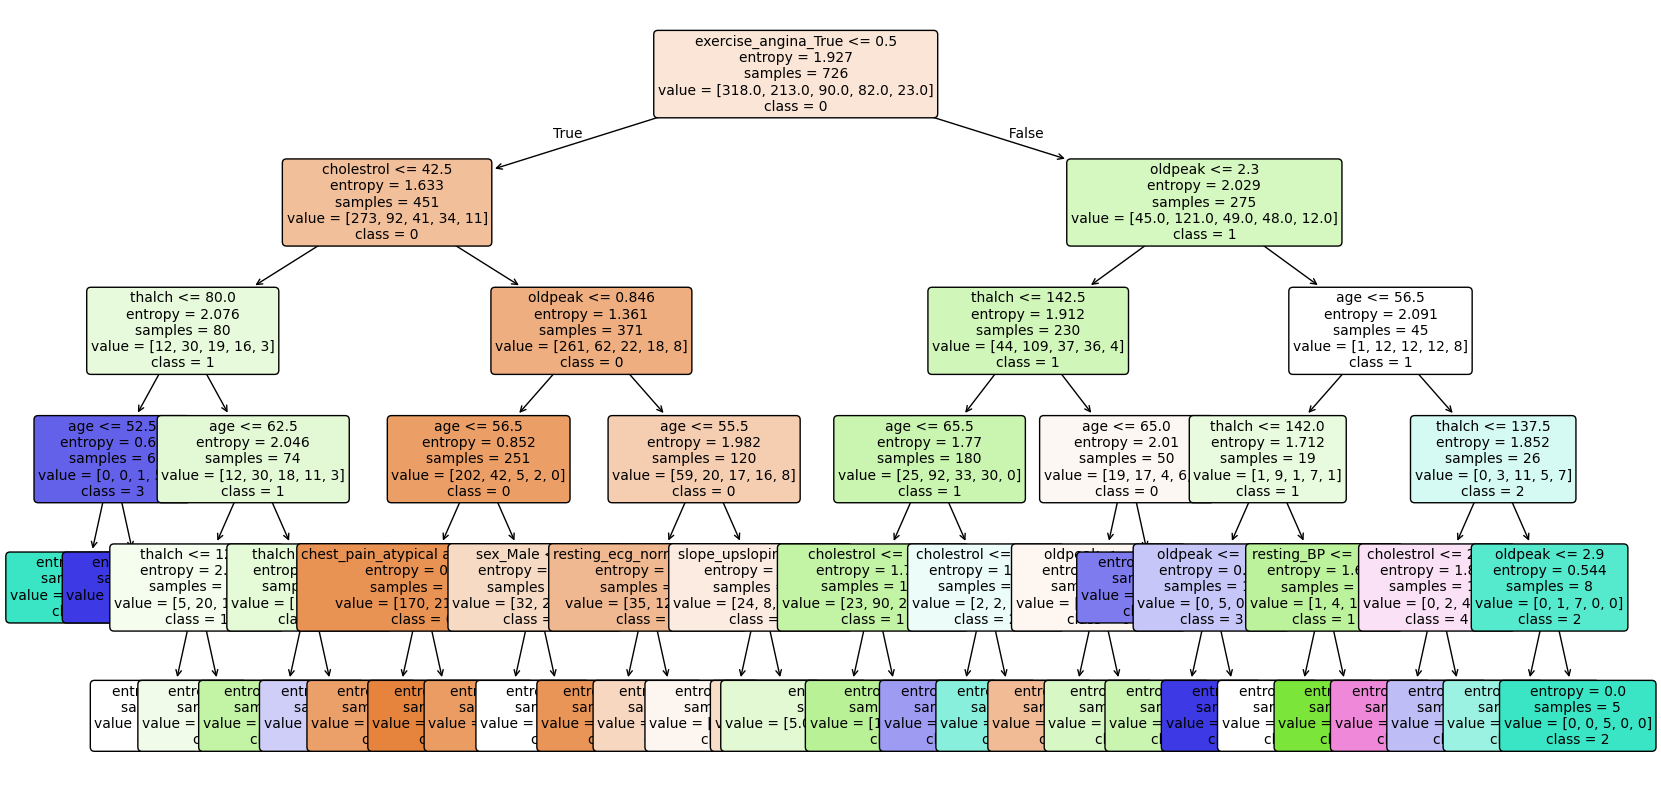

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=[str(i) for i in range(5)], rounded=True, fontsize=10)
plt.show()


#Interview Questions:
##What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

* Max Depth: Controls the maximum depth of the tree. A deeper tree can capture more details but may overfit the data.

* Min Samples Split: The minimum number of samples required to split an internal node. Higher values prevent splitting small nodes, reducing overfitting.

* Criterion: The function used to measure the quality of a split ('gini' for Gini impurity and 'entropy' for information gain).

##What is the difference between Label Encoding and One-Hot Encoding?

* Label Encoding: Converts categorical values into numerical labels (e.g., 'Male' to 0 and 'Female' to 1). It is suitable for ordinal categorical features but may introduce unintended ordinal relationships for nominal features.

* One-Hot Encoding: Converts categorical values into binary vectors with a separate column for each category (e.g., 'Male' becomes [1, 0] and 'Female' becomes [0, 1]). It is suitable for nominal categorical features and avoids introducing ordinal relationships.